In [33]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [35]:
dataset = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
dataset['MEDV'] = boston_dataset.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


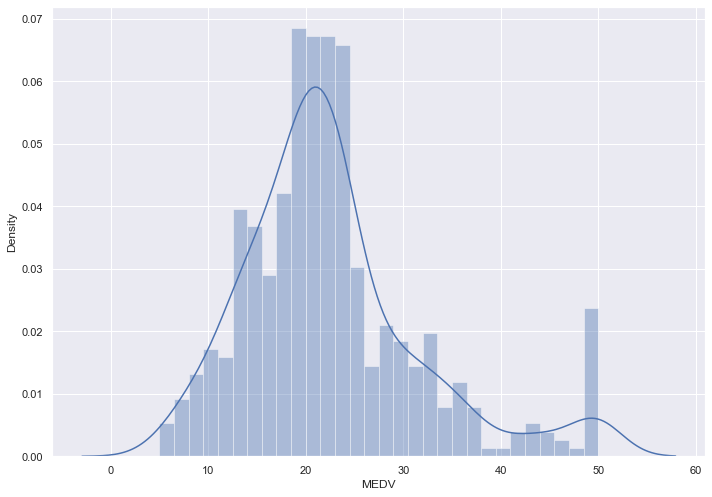

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['MEDV'], bins=30)
plt.show()

In [38]:
X = pd.DataFrame(np.c_[dataset['CRIM'], dataset['ZN'], dataset['INDUS'], dataset['CHAS'], dataset['NOX'], dataset['RM'], dataset['AGE'], dataset['DIS'], dataset['RAD'], dataset['TAX'], dataset['PTRATIO'], dataset['B'], dataset['LSTAT']], columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
# Y = pd.DataFrame(np.c_[dataset['MEDV']], columns = ['MEDV'])
Y = dataset['MEDV']

In [39]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [40]:
# Fucntion to generate the polynomial terms

def get_powers(degree):
    l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    powers = []
    for i in range(1, degree+1):
        powers.append([x for x in combinations_with_replacement(l, i)])
    powers_flattened = []
    for sublist in powers:
        for x in sublist:
            powers_flattened.append(x)
    return powers_flattened

In [41]:
# Function to convert the feature values into their respective polynomial features

def transform_data(X, powers):
    X_new = np.ones((X.shape[0], len(powers)))
    for n in range(X.shape[0]):
        for i in range(len(powers)):
            for j in powers[i]:
                X_new[n][i] = X_new[n][i] * X[n][j]
    return X_new

In [42]:
# Calculating the cost

def CostFunction(x, y, weight, bias):
    cost = np.sum((((x.dot(weight) + bias) - y) ** 2) / (2*len(y)))
    return cost

In [43]:
# Gradient Descent

def GradientDescent(x, y, weight, bias, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        h = x.dot(weight) + bias
        loss = h - y
        
        bias_gradient = np.sum(loss) / len(y)
        weight_gradient = x.T.dot(loss) / len(y)
                
        bias = bias - learning_rate * bias_gradient
        weight = weight - learning_rate * weight_gradient
        
        cost = CostFunction(x, y, weight, bias)
        cost_list[epoch] = cost
        
        print("Cost at epoch",epoch,"is:",cost)
        
    return weight, bias, cost_list

In [44]:
# Predicting the values for the testing dataset

def predict(X, weight, bias):
    return X.dot(weight) + bias

In [45]:
# Calculating the r² accuracy of our model

def r2score(y_pred, Y_test):
    rss = np.sum((y_pred - Y_test) ** 2)
    tss = np.sum((Y_test - Y_test.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

## Polynomial Degree 1:

In [46]:
# Degree 1

# powers_1 stores the degree 1 terms
powers_1 = get_powers(1)

# X_1 stores the degree 1 polynomial features
X_1 = transform_data(X, powers_1)

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, Y, test_size=0.2, random_state=5)

In [47]:
# Calculating weights, bias and cost with weights and bias being zeros and the learning rate (alpha) = 0.01 and polynomial degree = 1

weight, bias, cost = GradientDescent(X_1_train, y_1_train, np.zeros(X_1_train.shape[1]), 0, 0.01, epochs=1500)

Cost at epoch 0 is: 291.6584787203993
Cost at epoch 1 is: 284.315400198861
Cost at epoch 2 is: 277.32492714288685
Cost at epoch 3 is: 270.65590556280574
Cost at epoch 4 is: 264.2806312240359
Cost at epoch 5 is: 258.1744489774137
Cost at epoch 6 is: 252.3153990258961
Cost at epoch 7 is: 246.6839046210285
Cost at epoch 8 is: 241.26249632878944
Cost at epoch 9 is: 236.0355685747836
Cost at epoch 10 is: 230.98916468219386
Cost at epoch 11 is: 226.1107870602551
Cost at epoch 12 is: 221.38922959321422
Cost at epoch 13 is: 216.81442962592155
Cost at epoch 14 is: 212.3773372477478
Cost at epoch 15 is: 208.06979984621438
Cost at epoch 16 is: 203.88446013976883
Cost at epoch 17 is: 199.81466610924218
Cost at epoch 18 is: 195.85439143297864
Cost at epoch 19 is: 191.99816519431187
Cost at epoch 20 is: 188.24100977454168
Cost at epoch 21 is: 184.57838597208615
Cost at epoch 22 is: 181.00614450104263
Cost at epoch 23 is: 177.52048312173787
Cost at epoch 24 is: 174.11790874353966
Cost at epoch 25 is:

Cost at epoch 237 is: 14.230782201137242
Cost at epoch 238 is: 14.184630008404785
Cost at epoch 239 is: 14.139357490022729
Cost at epoch 240 is: 14.094947287077165
Cost at epoch 241 is: 14.05138238606666
Cost at epoch 242 is: 14.008646112002644
Cost at epoch 243 is: 13.966722121648038
Cost at epoch 244 is: 13.925594396891352
Cost at epoch 245 is: 13.88524723825352
Cost at epoch 246 is: 13.845665258524821
Cost at epoch 247 is: 13.806833376529294
Cost at epoch 248 is: 13.768736811013982
Cost at epoch 249 is: 13.731361074660658
Cost at epoch 250 is: 13.694691968217422
Cost at epoch 251 is: 13.658715574747845
Cost at epoch 252 is: 13.623418253995286
Cost at epoch 253 is: 13.588786636860025
Cost at epoch 254 is: 13.554807619987033
Cost at epoch 255 is: 13.521468360462059
Cost at epoch 256 is: 13.488756270613894
Cost at epoch 257 is: 13.45665901292076
Cost at epoch 258 is: 13.425164495018556
Cost at epoch 259 is: 13.394260864809123
Cost at epoch 260 is: 13.363936505666349
Cost at epoch 261 i

Cost at epoch 595 is: 11.559767752060917
Cost at epoch 596 is: 11.559060669828323
Cost at epoch 597 is: 11.558356229463413
Cost at epoch 598 is: 11.557654410125128
Cost at epoch 599 is: 11.556955191271559
Cost at epoch 600 is: 11.556258552654544
Cost at epoch 601 is: 11.555564474314352
Cost at epoch 602 is: 11.554872936574498
Cost at epoch 603 is: 11.554183920036607
Cost at epoch 604 is: 11.553497405575444
Cost at epoch 605 is: 11.552813374333965
Cost at epoch 606 is: 11.552131807718535
Cost at epoch 607 is: 11.551452687394182
Cost at epoch 608 is: 11.55077599527998
Cost at epoch 609 is: 11.550101713544493
Cost at epoch 610 is: 11.54942982460132
Cost at epoch 611 is: 11.548760311104743
Cost at epoch 612 is: 11.54809315594541
Cost at epoch 613 is: 11.547428342246153
Cost at epoch 614 is: 11.546765853357856
Cost at epoch 615 is: 11.546105672855411
Cost at epoch 616 is: 11.54544778453375
Cost at epoch 617 is: 11.544792172403946
Cost at epoch 618 is: 11.544138820689419
Cost at epoch 619 is

Cost at epoch 981 is: 11.395546186087397
Cost at epoch 982 is: 11.395291275412713
Cost at epoch 983 is: 11.395036917013282
Cost at epoch 984 is: 11.394783109298544
Cost at epoch 985 is: 11.394529850683588
Cost at epoch 986 is: 11.394277139589132
Cost at epoch 987 is: 11.394024974441495
Cost at epoch 988 is: 11.393773353672575
Cost at epoch 989 is: 11.393522275719825
Cost at epoch 990 is: 11.393271739026229
Cost at epoch 991 is: 11.393021742040274
Cost at epoch 992 is: 11.392772283215935
Cost at epoch 993 is: 11.392523361012643
Cost at epoch 994 is: 11.392274973895265
Cost at epoch 995 is: 11.392027120334074
Cost at epoch 996 is: 11.391779798804745
Cost at epoch 997 is: 11.391533007788308
Cost at epoch 998 is: 11.391286745771144
Cost at epoch 999 is: 11.391041011244944
Cost at epoch 1000 is: 11.390795802706709
Cost at epoch 1001 is: 11.390551118658706
Cost at epoch 1002 is: 11.39030695760846
Cost at epoch 1003 is: 11.390063318068723
Cost at epoch 1004 is: 11.389820198557452
Cost at epoc

Cost at epoch 1347 is: 11.32942358712143
Cost at epoch 1348 is: 11.329297486254934
Cost at epoch 1349 is: 11.32917160094053
Cost at epoch 1350 is: 11.329045930687377
Cost at epoch 1351 is: 11.328920475006063
Cost at epoch 1352 is: 11.328795233408608
Cost at epoch 1353 is: 11.328670205408454
Cost at epoch 1354 is: 11.328545390520464
Cost at epoch 1355 is: 11.328420788260924
Cost at epoch 1356 is: 11.328296398147524
Cost at epoch 1357 is: 11.328172219699361
Cost at epoch 1358 is: 11.32804825243693
Cost at epoch 1359 is: 11.327924495882133
Cost at epoch 1360 is: 11.327800949558249
Cost at epoch 1361 is: 11.327677612989959
Cost at epoch 1362 is: 11.327554485703313
Cost at epoch 1363 is: 11.327431567225748
Cost at epoch 1364 is: 11.327308857086072
Cost at epoch 1365 is: 11.327186354814454
Cost at epoch 1366 is: 11.327064059942437
Cost at epoch 1367 is: 11.326941972002915
Cost at epoch 1368 is: 11.326820090530141
Cost at epoch 1369 is: 11.326698415059717
Cost at epoch 1370 is: 11.32657694512

Text(0.5, 1.0, 'Training Cost')

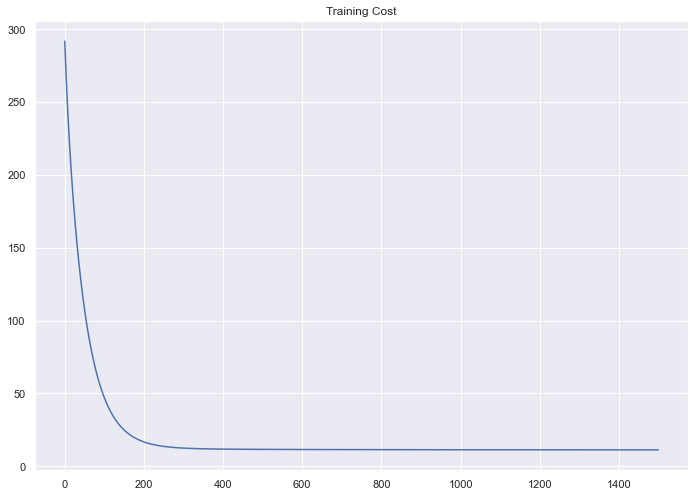

In [48]:
# Plotting the training loss at each epoch

epochs = [i for i in range(1500)]

plt.plot(epochs, cost)
plt.title("Training Cost")

In [49]:
y_1_pred = predict(X_1_test, weight, bias)

In [50]:
y_1_pred

array([37.39551251, 31.48136315, 27.32429926,  5.39446771, 35.07312219,
        5.79589562, 27.67225623, 31.76857373, 26.93559821, 22.51716813,
       32.3177069 , 21.24537097, 23.64345394, 32.78007266, 28.0814649 ,
       15.22544794, -0.17295222, 18.93841164, 14.06732225, 14.04994965,
        3.65344124, 20.07948738, 38.05860614, 24.25199817, 31.36720848,
       11.14233117, 25.00439892, 23.81873835, 22.37743876, 21.52048374,
       13.80774539,  8.55148669, 18.22349913, 22.48493311, 28.70345867,
       19.38398324, 30.15314207,  8.66723541, 40.90566098, 34.26069912,
       20.57186141,  2.84886071, 29.67559022, 12.0868959 , 26.75780304,
       30.96509242, -6.17938227, 18.47751387, 21.32459551, 12.80544079,
       20.8931313 , 19.23524405, 23.95894053, 12.88257675, 17.49062891,
       25.36669433, 35.28936299, 15.23205382, 27.94078276, 20.78880056,
       20.76595908, 25.87281078, 14.98515121, 33.13025648, 23.41749529,
       13.01294364, 19.48409639, 24.52464449, 21.4448282 , 21.74

In [51]:
y_1_test.values

array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2, 33.2,
       19. , 20.3, 36.1, 24.4, 17.2, 17.9, 19.6, 19.7, 15. ,  8.1, 23. ,
       44.8, 23.1, 32.2, 10.8, 23.1, 21.2, 22.2, 24.1, 17.3,  7. , 12.7,
       17.8, 26.4, 19.6, 25.1,  8.3, 48.8, 34.9, 13.8, 14.4, 30.1, 12.7,
       27.1, 24.8,  7. , 20.5, 21.5, 14. , 20.4, 22.2, 21.4, 13.5, 19.4,
       24.7, 43.8, 14.1, 28.6, 19.7, 16.8, 23.2, 16.2, 41.3, 22.7,  8.3,
       18.4, 24.7, 21.7, 20.6, 16.7, 22.1, 19.4, 27.5, 27.9, 30.1, 17.4,
       15.4, 31. , 14.2, 19.6, 50. , 21.7, 11.7, 19.4, 13. , 17.5,  9.7,
       20.3, 18.6, 50. , 19.6, 21.4, 18.4, 22.6, 25. , 15.6, 26.6, 22.4,
       13.1, 23. , 24.5])

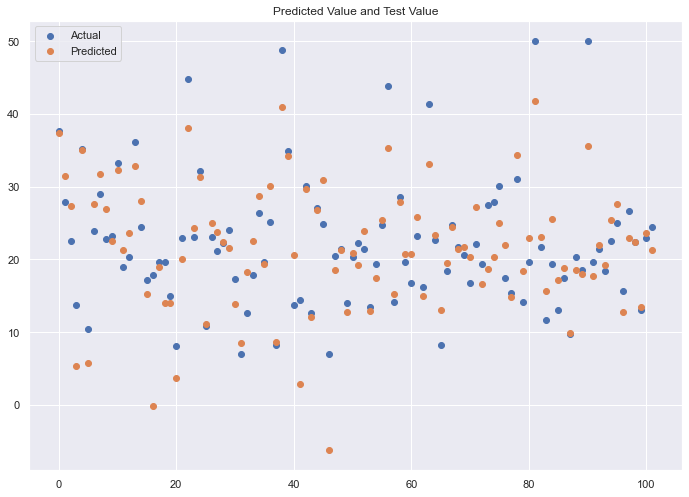

In [52]:
# Plotting the actual and predicted testing dataset values

y_range = [i for i in range(len(y_1_test))]

plt.scatter(y_range, y_1_test)
plt.scatter(y_range, y_1_pred)
plt.title("Predicted Value and Test Value")
plt.legend(labels = ('Actual','Predicted'), loc='upper left')

In [53]:
r2score_1 = r2score(y_1_pred, y_1_test)
print(r2score_1)

0.7361941125156077


## Polynomial Degree 2:

In [54]:
# Degree 2

# powers_2 stores the degree 2 terms
powers_2 = get_powers(2)

# X_2 stores the degree 2 polynomial features
X_2 = transform_data(X, powers_2)

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, Y, test_size=0.2, random_state=5)

In [55]:
# Calculating weights, bias and cost with weights and bias being zeros and the learning rate (alpha) = 0.01 and polynomial degree = 2

weight, bias, cost = GradientDescent(X_2_train, y_2_train, np.zeros(X_2_train.shape[1]), 0, 0.01, epochs=1500)

Cost at epoch 0 is: 185.05068867449015
Cost at epoch 1 is: 143.6509532499322
Cost at epoch 2 is: 123.55422801112348
Cost at epoch 3 is: 111.48760240548815
Cost at epoch 4 is: 102.96727624244079
Cost at epoch 5 is: 96.23365710671524
Cost at epoch 6 is: 90.53539413973994
Cost at epoch 7 is: 85.52627401639205
Cost at epoch 8 is: 81.03091547085512
Cost at epoch 9 is: 76.9495676291102
Cost at epoch 10 is: 73.21822223929149
Cost at epoch 11 is: 69.79129486390087
Cost at epoch 12 is: 66.63371882445088
Cost at epoch 13 is: 63.717079493694236
Cost at epoch 14 is: 61.01755702017408
Cost at epoch 15 is: 58.51472718660462
Cost at epoch 16 is: 56.190800691169095
Cost at epoch 17 is: 54.03010560487824
Cost at epoch 18 is: 52.01871588002955
Cost at epoch 19 is: 50.144173745714205
Cost at epoch 20 is: 48.39527574625052
Cost at epoch 21 is: 46.76190367218064
Cost at epoch 22 is: 45.23488812852857
Cost at epoch 23 is: 43.8058964108648
Cost at epoch 24 is: 42.46733886419878
Cost at epoch 25 is: 41.212289

Cost at epoch 219 is: 11.495514313156711
Cost at epoch 220 is: 11.472289436278633
Cost at epoch 221 is: 11.449221622045982
Cost at epoch 222 is: 11.426308891645537
Cost at epoch 223 is: 11.403549301685842
Cost at epoch 224 is: 11.380940943401846
Cost at epoch 225 is: 11.358481941880582
Cost at epoch 226 is: 11.336170455307288
Cost at epoch 227 is: 11.314004674231404
Cost at epoch 228 is: 11.291982820851729
Cost at epoch 229 is: 11.270103148320308
Cost at epoch 230 is: 11.248363940064387
Cost at epoch 231 is: 11.226763509125952
Cost at epoch 232 is: 11.205300197518326
Cost at epoch 233 is: 11.183972375599303
Cost at epoch 234 is: 11.162778441460372
Cost at epoch 235 is: 11.141716820331517
Cost at epoch 236 is: 11.120785964001199
Cost at epoch 237 is: 11.099984350250999
Cost at epoch 238 is: 11.079310482304574
Cost at epoch 239 is: 11.058762888290495
Cost at epoch 240 is: 11.03834012071852
Cost at epoch 241 is: 11.018040755969004
Cost at epoch 242 is: 10.997863393794981
Cost at epoch 243

Cost at epoch 503 is: 7.885694319949048
Cost at epoch 504 is: 7.878256071885812
Cost at epoch 505 is: 7.870837745679156
Cost at epoch 506 is: 7.86343925701001
Cost at epoch 507 is: 7.856060522135149
Cost at epoch 508 is: 7.848701457881564
Cost at epoch 509 is: 7.841361981640906
Cost at epoch 510 is: 7.8340420113640015
Cost at epoch 511 is: 7.826741465555433
Cost at epoch 512 is: 7.819460263268179
Cost at epoch 513 is: 7.812198324098307
Cost at epoch 514 is: 7.804955568179761
Cost at epoch 515 is: 7.797731916179172
Cost at epoch 516 is: 7.790527289290757
Cost at epoch 517 is: 7.783341609231271
Cost at epoch 518 is: 7.7761747982350045
Cost at epoch 519 is: 7.769026779048859
Cost at epoch 520 is: 7.7618974749274745
Cost at epoch 521 is: 7.7547868096284045
Cost at epoch 522 is: 7.747694707407358
Cost at epoch 523 is: 7.7406210930134876
Cost at epoch 524 is: 7.733565891684751
Cost at epoch 525 is: 7.726529029143292
Cost at epoch 526 is: 7.719510431590917
Cost at epoch 527 is: 7.712510025704

Cost at epoch 720 is: 6.633505142661425
Cost at epoch 721 is: 6.629048359612991
Cost at epoch 722 is: 6.624601028744129
Cost at epoch 723 is: 6.620163122623525
Cost at epoch 724 is: 6.615734613928484
Cost at epoch 725 is: 6.611315475444282
Cost at epoch 726 is: 6.60690568006356
Cost at epoch 727 is: 6.602505200785705
Cost at epoch 728 is: 6.598114010716225
Cost at epoch 729 is: 6.593732083066159
Cost at epoch 730 is: 6.5893593911514685
Cost at epoch 731 is: 6.584995908392438
Cost at epoch 732 is: 6.580641608313088
Cost at epoch 733 is: 6.576296464540583
Cost at epoch 734 is: 6.571960450804653
Cost at epoch 735 is: 6.567633540937013
Cost at epoch 736 is: 6.5633157088707925
Cost at epoch 737 is: 6.559006928639964
Cost at epoch 738 is: 6.554707174378779
Cost at epoch 739 is: 6.550416420321213
Cost at epoch 740 is: 6.546134640800404
Cost at epoch 741 is: 6.54186181024811
Cost at epoch 742 is: 6.53759790319415
Cost at epoch 743 is: 6.533342894265877
Cost at epoch 744 is: 6.52909675818763
Co

Cost at epoch 944 is: 5.829476806046934
Cost at epoch 945 is: 5.8266056783299325
Cost at epoch 946 is: 5.823739771871866
Cost at epoch 947 is: 5.820879073894851
Cost at epoch 948 is: 5.818023571659666
Cost at epoch 949 is: 5.815173252465604
Cost at epoch 950 is: 5.8123281036503185
Cost at epoch 951 is: 5.809488112589688
Cost at epoch 952 is: 5.806653266697666
Cost at epoch 953 is: 5.8038235534261435
Cost at epoch 954 is: 5.800998960264808
Cost at epoch 955 is: 5.798179474740987
Cost at epoch 956 is: 5.795365084419522
Cost at epoch 957 is: 5.792555776902631
Cost at epoch 958 is: 5.789751539829755
Cost at epoch 959 is: 5.786952360877423
Cost at epoch 960 is: 5.784158227759128
Cost at epoch 961 is: 5.781369128225165
Cost at epoch 962 is: 5.778585050062518
Cost at epoch 963 is: 5.775805981094711
Cost at epoch 964 is: 5.77303190918167
Cost at epoch 965 is: 5.7702628222196
Cost at epoch 966 is: 5.767498708140838
Cost at epoch 967 is: 5.764739554913731
Cost at epoch 968 is: 5.761985350542493


Cost at epoch 1163 is: 5.306379543290952
Cost at epoch 1164 is: 5.304402358864129
Cost at epoch 1165 is: 5.302428321056496
Cost at epoch 1166 is: 5.300457422997064
Cost at epoch 1167 is: 5.298489657833176
Cost at epoch 1168 is: 5.296525018730453
Cost at epoch 1169 is: 5.294563498872719
Cost at epoch 1170 is: 5.292605091461963
Cost at epoch 1171 is: 5.290649789718276
Cost at epoch 1172 is: 5.288697586879792
Cost at epoch 1173 is: 5.28674847620263
Cost at epoch 1174 is: 5.284802450960843
Cost at epoch 1175 is: 5.282859504446364
Cost at epoch 1176 is: 5.280919629968944
Cost at epoch 1177 is: 5.2789828208560925
Cost at epoch 1178 is: 5.277049070453037
Cost at epoch 1179 is: 5.2751183721226615
Cost at epoch 1180 is: 5.273190719245436
Cost at epoch 1181 is: 5.271266105219396
Cost at epoch 1182 is: 5.26934452346005
Cost at epoch 1183 is: 5.26742596740035
Cost at epoch 1184 is: 5.265510430490631
Cost at epoch 1185 is: 5.263597906198555
Cost at epoch 1186 is: 5.261688388009059
Cost at epoch 118

Cost at epoch 1396 is: 4.91836040306422
Cost at epoch 1397 is: 4.916962947130099
Cost at epoch 1398 is: 4.915567433945602
Cost at epoch 1399 is: 4.914173859710152
Cost at epoch 1400 is: 4.91278222063236
Cost at epoch 1401 is: 4.911392512930007
Cost at epoch 1402 is: 4.910004732830005
Cost at epoch 1403 is: 4.908618876568383
Cost at epoch 1404 is: 4.907234940390257
Cost at epoch 1405 is: 4.905852920549804
Cost at epoch 1406 is: 4.904472813310237
Cost at epoch 1407 is: 4.903094614943784
Cost at epoch 1408 is: 4.901718321731654
Cost at epoch 1409 is: 4.900343929964016
Cost at epoch 1410 is: 4.898971435939979
Cost at epoch 1411 is: 4.8976008359675545
Cost at epoch 1412 is: 4.896232126363648
Cost at epoch 1413 is: 4.894865303454024
Cost at epoch 1414 is: 4.893500363573274
Cost at epoch 1415 is: 4.8921373030648105
Cost at epoch 1416 is: 4.890776118280828
Cost at epoch 1417 is: 4.889416805582282
Cost at epoch 1418 is: 4.8880593613388665
Cost at epoch 1419 is: 4.886703781928988
Cost at epoch 1

Text(0.5, 1.0, 'Training Cost')

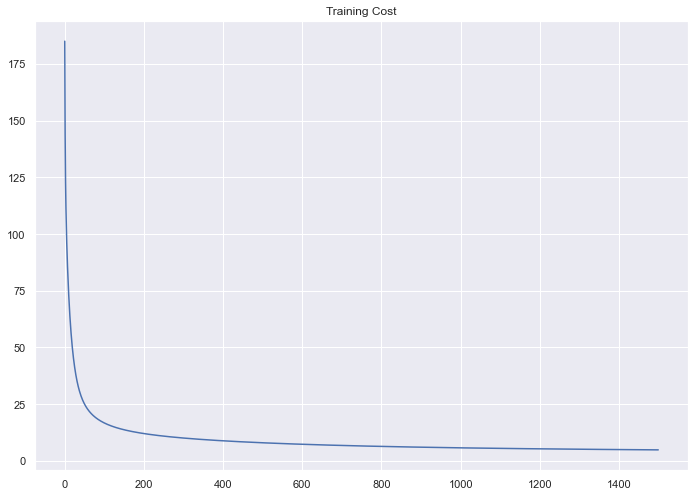

In [56]:
# Plotting the training loss at each epoch

epochs = [i for i in range(1500)]

plt.plot(epochs, cost)
plt.title("Training Cost")

In [57]:
y_2_pred = predict(X_2_test, weight, bias)

In [58]:
y_2_pred

array([40.10612634, 30.70812097, 27.8397617 ,  9.09505577, 31.58618951,
        8.3660861 , 29.04506452, 27.10593266, 21.96057971, 21.60986646,
       36.51006355, 21.33260149, 19.48797842, 32.94910226, 25.81410924,
       19.11102475, 12.71695016, 16.18848129, 13.78096847, 19.69894849,
       13.18944444, 18.86164902, 41.21485591, 20.70183119, 33.9576213 ,
        9.81028343, 22.46917548, 18.39788693, 22.28959265, 24.54538343,
       17.38519402, 14.43761016, 17.36067092, 15.24002766, 24.54840031,
       17.75944571, 25.8366838 , 11.2240393 , 48.27100444, 36.737709  ,
       19.07273093, 12.47976405, 25.0712349 , 13.14989916, 27.88235747,
       27.94081561, 10.08634555, 20.23815044, 19.50487921, 12.4129587 ,
       20.72500045, 19.05600695, 19.65540307, 14.31777597, 16.00407794,
       24.11454934, 43.95011955, 13.13045056, 30.1749064 , 20.2142358 ,
       16.46764608, 23.75016154, 15.10562359, 38.13169297, 23.85709227,
       13.40933167, 17.94250175, 28.39176381, 20.1080488 , 23.42

In [59]:
y_2_test.values

array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2, 33.2,
       19. , 20.3, 36.1, 24.4, 17.2, 17.9, 19.6, 19.7, 15. ,  8.1, 23. ,
       44.8, 23.1, 32.2, 10.8, 23.1, 21.2, 22.2, 24.1, 17.3,  7. , 12.7,
       17.8, 26.4, 19.6, 25.1,  8.3, 48.8, 34.9, 13.8, 14.4, 30.1, 12.7,
       27.1, 24.8,  7. , 20.5, 21.5, 14. , 20.4, 22.2, 21.4, 13.5, 19.4,
       24.7, 43.8, 14.1, 28.6, 19.7, 16.8, 23.2, 16.2, 41.3, 22.7,  8.3,
       18.4, 24.7, 21.7, 20.6, 16.7, 22.1, 19.4, 27.5, 27.9, 30.1, 17.4,
       15.4, 31. , 14.2, 19.6, 50. , 21.7, 11.7, 19.4, 13. , 17.5,  9.7,
       20.3, 18.6, 50. , 19.6, 21.4, 18.4, 22.6, 25. , 15.6, 26.6, 22.4,
       13.1, 23. , 24.5])

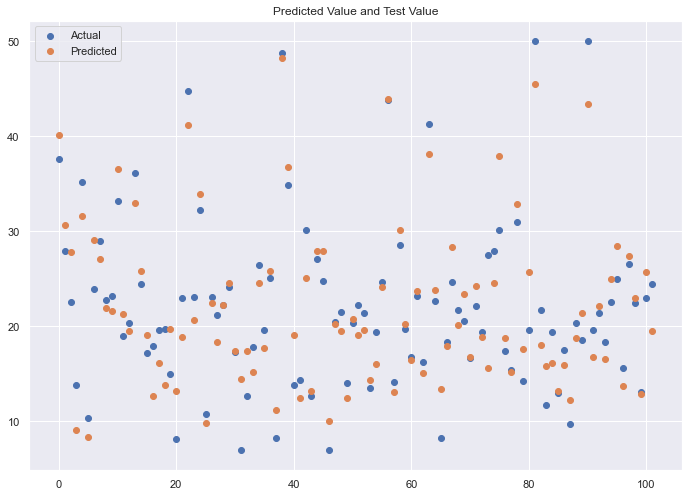

In [60]:
# Plotting the actual and predicted testing dataset values

y_range = [i for i in range(len(y_2_test))]

plt.scatter(y_range, y_2_test)
plt.scatter(y_range, y_2_pred)
plt.title("Predicted Value and Test Value")
plt.legend(labels = ('Actual','Predicted'), loc='upper left')

In [61]:
r2score_2 = r2score(y_2_pred, y_2_test)
print(r2score_2)

0.8673158585254191


In [66]:
# Training the machine learing model using the in-built python library: scikit-learn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

def scikit_learn(degree):
    polynomial = PolynomialFeatures(degree = degree)
    X_train_polynomial = polynomial.fit_transform(X_train)
    X_test_polynomial = polynomial.fit_transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train_polynomial, y_train)

    y_predict = lr.predict(X_test_polynomial)

    # Input code here:
    print("Train score:")

    print(lr.score(X_train_polynomial, y_train))

    print("Test score:")
    print(lr.score(X_test_polynomial, y_test))

In [67]:
# Degree 1

scikit_learn(1)

Train score:
0.738339392059052
Test score:
0.7334492147453069


In [68]:
# Degree 2

scikit_learn(2)

Train score:
0.931529740262843
Test score:
0.8690246514502532
